# Williams FinOps Optimization: Exploratory Data Analysis & Preparation  for ML

This notebook details the exploratory data analysis (EDA) conducted on financial data from Williams, a company in the oil and gas sector, with a focus on operational optimization and predictive modeling. The goal of this notebook is to comprehensively explore, validate, and prepare the data before advancing to machine learning model development. This includes data cleaning, outlier analysis, feature engineering, and ensuring statistical stability of key financial features.

The analysis and transformation steps documented in this notebook serve the following purposes:
- Understanding and Assessing Data Quality: The initial data exploration helps ensure that our data is accurate, reliable, and free from inconsistencies. We used descriptive statistics, histograms, and box plots to assess the distribution, identify trends, and flag any unusual values in key features like revenue, expenses, and growth metrics.
- Handling Anomalies and Outliers: Identified anomalies were carefully reviewed to determine whether they represented valid real-world behavior or were erroneous. This led us to adopt targeted outlier-handling methods, maintaining a balance between data integrity and predictive model stability.
- Feature Engineering & Scaling: Features such as Year-over-Year Revenue Growth, Depreciation Percent of Revenue, and Rolling Average Revenue were derived to create new dimensions that enhance our understanding of business performance. Subsequently, the features were standardized using the StandardScaler technique, ensuring each feature contributes proportionately to the ML model and preventing any biases from impacting model training.
- Saving Data for ML Modeling: The cleaned and transformed data was saved as a Spark table, allowing for efficient retrieval in subsequent ML notebooks. This setup ensures smooth integration between the EDA and ML phases of the project while providing a reproducible workflow for data science best practices.

## Table of Contents

#### 1. Data Loading
Load raw data from various sources, such as Excel files and CSV files. The data is loaded into Pandas DataFrames to facilitate easy manipulation and transformation.

#### 2. Data Cleaning
Handle missing values, filter out invalid or irrelevant data points, and remove rows with all key financial metrics set to zero. The goal is to ensure that the dataset is reliable and ready for analysis.

#### 3. Exploratory Data Analysis (EDA)
- **Feature Distributions**: Use histograms to understand the distribution of features like revenues, expenses, and net income. This step helps identify patterns and gain insights into data trends.
- **Outlier Analysis**: Use box plots to detect outliers, which are then reviewed to determine whether they should be capped or retained.
- **Growth Rate Analysis**: Investigate YoY growth rates for revenue and net income to analyze business trends and identify any significant drops or spikes.
- **Correlation Analysis**: Assess correlations between features to understand dependencies and identify redundant features.

#### 4. Feature Engineering
Create additional features such as Year-over-Year Revenue Growth, Profit Margin, Depreciation Percent of Revenue, and more. These derived features provide new dimensions for modeling that capture key business insights.

#### 5. Advanced Feature Engineering for Predictive Analysis
Develop more sophisticated features intended for predictive modeling, such as lag features, rolling averages, and other metrics that can capture time-based dependencies.

#### 6. Feature Scaling
Standardize the numerical features using StandardScaler from scikit-learn. This step ensures that all features contribute equally during ML modeling and prevents bias from features with larger numerical ranges.

#### 7. Saving the Data
Save the cleaned, feature-engineered, and scaled dataset as a managed Spark table. This facilitates easy retrieval during the machine learning phase, ensuring a smooth and efficient workflow.

#### 8. Next Steps

In [0]:
# Load the saved Spark DataFrame from the managed table
spark_df = spark.table("feature_engineered_table")

# Convert the Spark DataFrame to a Pandas DataFrame
df_eda = spark_df.toPandas()

# Display the first few rows to confirm the conversion
df_eda.head()


,Service_revenues,Product_sales,Total_revenues,Depreciation_and_amortization_expenses,Interest_expense,Net_income_loss,YoY_Revenue_Growth,YoY_Net_Income_Growth,Depreciation_Percent_Revenue,Interest_Expense_Percent_Revenue,Revenue_Lag_1,Net_Income_Lag_1,Revenue_Rolling_Avg_3Y,Profit_Margin_Lag_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,10907.0,2117.0,10916.666667,0.193069
1,7026.0,2779.0,10907.0,2071.0,0.0,3303.0,0.000000,0.000000,0.189878,0.0,0.0,0.0,10916.666667,0.000000
2,490.0,0.0,10907.0,0.0,0.0,3303.0,0.000000,0.000000,0.000000,0.0,10907.0,3303.0,7271.333333,0.302833
3,0.0,0.0,10907.0,0.0,0.0,3303.0,0.000000,0.000000,0.000000,0.0,10907.0,3303.0,10907.000000,0.302833
4,6536.0,4556.0,10965.0,2009.0,0.0,2117.0,0.005318,-0.359068,0.183219,0.0,10907.0,3303.0,10926.333333,0.302833


It is apparent that there are multiple rows with values of zero across several columns. This might be either due to genuine data from the original 10-K reports or as a result of data cleaning operations where missing values were replaced with zeros. This could be an area for further inspection to ensure there were no unintended artifacts left in the cleaning process.

In [0]:
# Check for any missing values in the dataset
null_counts = df_eda.isna().sum()
print("\n--- Missing Values in Columns ---")
print(null_counts)



--- Missing Values in Columns ---
Service_revenues                          0
Product_sales                             0
Total_revenues                            0
Depreciation_and_amortization_expenses    0
Interest_expense                          0
Net_income_loss                           0
YoY_Revenue_Growth                        0
YoY_Net_Income_Growth                     0
Depreciation_Percent_Revenue              0
Interest_Expense_Percent_Revenue          0
Revenue_Lag_1                             0
Net_Income_Lag_1                          0
Revenue_Rolling_Avg_3Y                    0
Profit_Margin_Lag_1                       0
dtype: int64


In [0]:
# Basic summary statistics of the numerical columns
df_eda.describe()


,Service_revenues,Product_sales,Total_revenues,Depreciation_and_amortization_expenses,Interest_expense,Net_income_loss,YoY_Revenue_Growth,YoY_Net_Income_Growth,Depreciation_Percent_Revenue,Interest_Expense_Percent_Revenue,Revenue_Lag_1,Net_Income_Lag_1,Revenue_Rolling_Avg_3Y,Profit_Margin_Lag_1
count,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2573.50000,1486.375000,9530.37500,740.250000,4.000000,2227.750000,-0.003188,-0.077654,0.068304,0.000365,9565.375000,2297.125000,10462.625000,0.210097
std,3287.18464,2117.315952,3852.46433,1023.601869,11.313708,1128.296915,0.011321,0.146101,0.094373,0.001032,3865.101734,1098.174906,1289.890760,0.100783
min,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.030825,-0.359068,0.000000,0.000000,0.000000,0.000000,7271.333333,0.000000
25%,0.00000,0.000000,10837.00000,0.000000,0.000000,1978.250000,0.000000,-0.065541,0.000000,0.000000,10907.000000,2117.000000,10893.333333,0.193069
50%,512.50000,10.000000,10907.00000,0.000000,0.000000,2117.000000,0.000000,0.000000,0.000000,0.000000,10907.000000,2117.000000,10916.666667,0.193069
75%,6134.75000,3218.250000,10965.00000,1883.750000,0.000000,3303.000000,0.000000,0.000000,0.175804,0.000000,10965.000000,3303.000000,10931.166667,0.302833
max,7026.00000,4556.000000,10965.00000,2071.000000,32.000000,3303.000000,0.005318,0.000000,0.189878,0.002918,10965.000000,3303.000000,10965.000000,0.302833


The minimum value for several features, including Service_revenues, Product_sales, Total_revenues, and Net_income_loss, is 0.0, suggesting that there are rows with zero values in these fields. While this may be legitimate, it's worth considering whether these zeros represent actual values or indicate missing data.

Additionally, the standard deviation for key features such as Service_revenues (3287.18464) and Product_sales (2117.315952) is quite high relative to their means. This suggests there might be high variability or a few outliers contributing to these numbers. Further exploration could help determine if there are extreme values that need handling.

Both YoY_Revenue_Growth and YoY_Net_Income_Growth contain negative values. The minimum YoY_Net_Income_Growth is -0.359068, which suggests there was a significant drop in net income for at least one year. This may be important in understanding year-over-year fluctuations and could provide insight into company performance over time.

Action points:
- Create visualizations like histograms or box plots to further understand the distribution of each feature. This could help identify if outliers are skewing any particular metric.
- Evaluate whether rows with zero values should be removed or flagged for special handling during modeling, particularly if they represent incomplete records.
- Confirm if the negative growth rates make sense within the context of company operations or if they indicate an error in data collection.

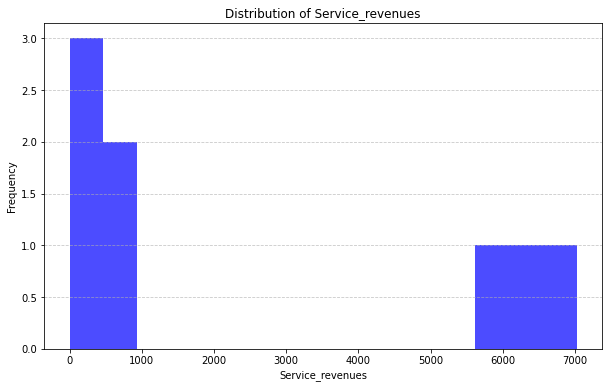

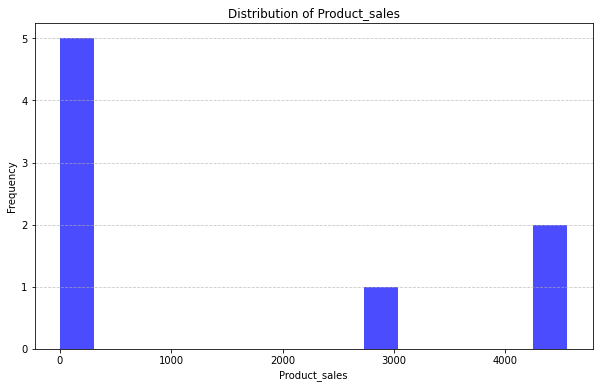

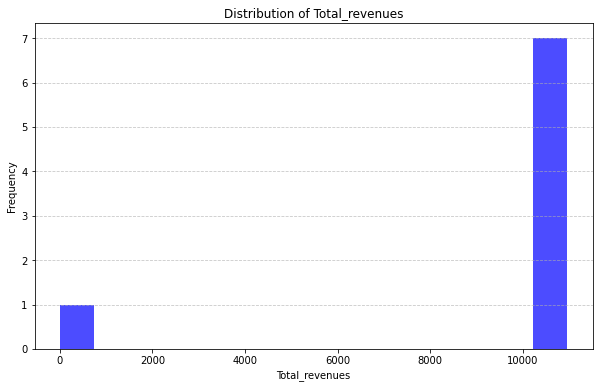

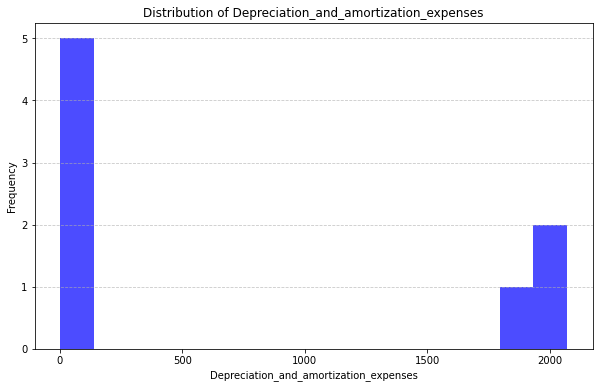

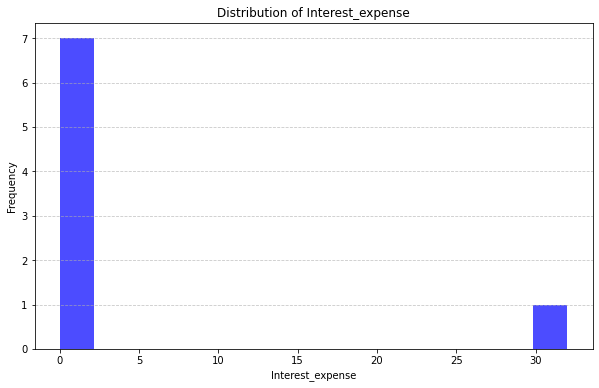

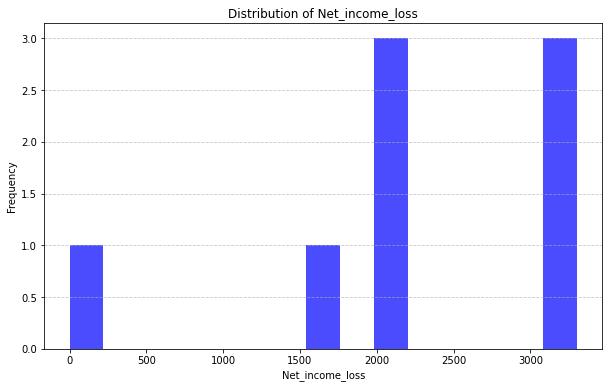

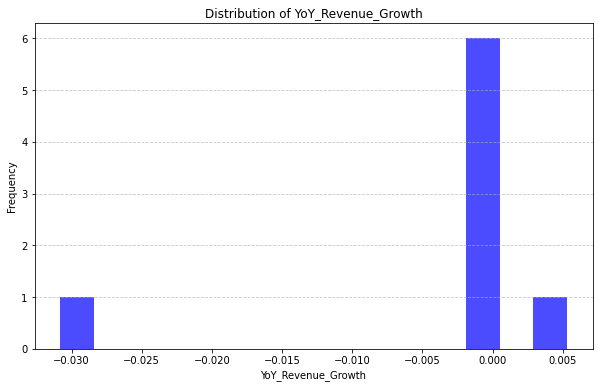

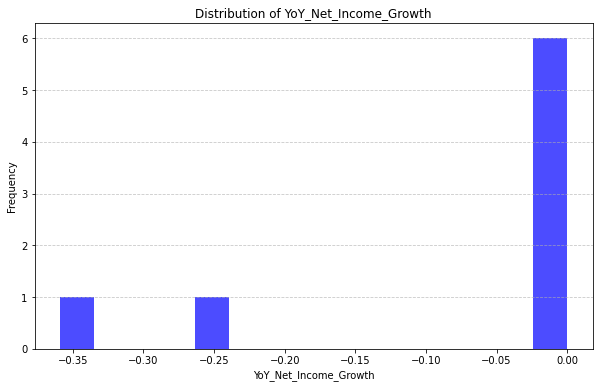

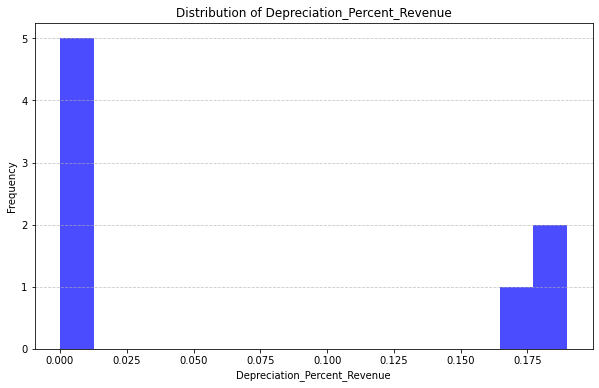

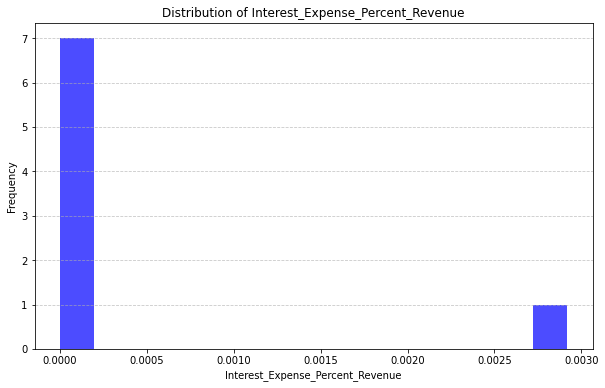

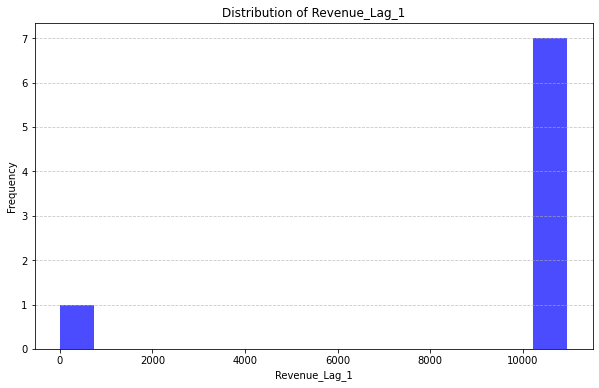

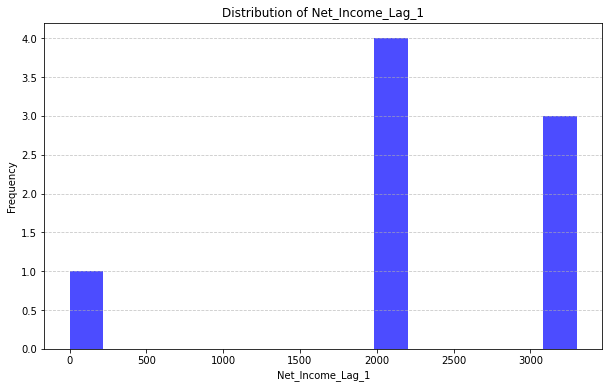

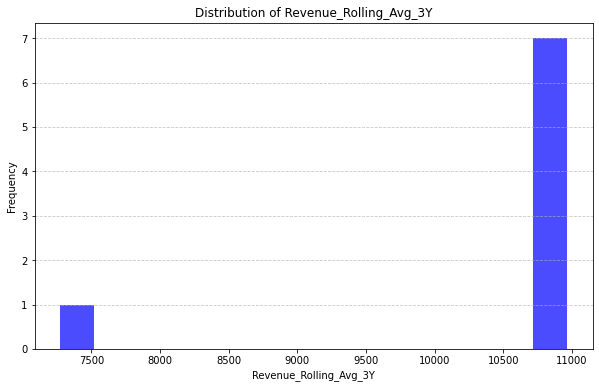

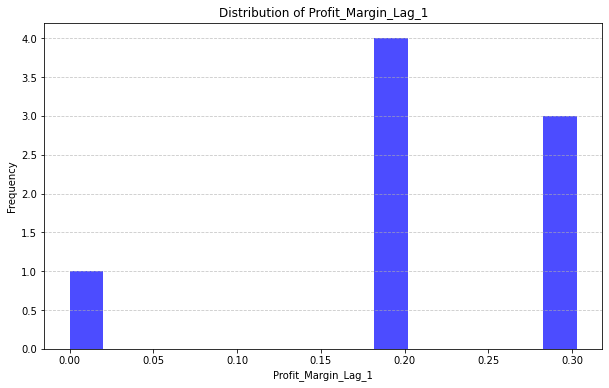

In [0]:
import matplotlib.pyplot as plt

# List of key features to plot
features = [
    'Service_revenues', 'Product_sales', 'Total_revenues',
    'Depreciation_and_amortization_expenses', 'Interest_expense',
    'Net_income_loss', 'YoY_Revenue_Growth', 'YoY_Net_Income_Growth',
    'Depreciation_Percent_Revenue', 'Interest_Expense_Percent_Revenue',
    'Revenue_Lag_1', 'Net_Income_Lag_1', 'Revenue_Rolling_Avg_3Y', 'Profit_Margin_Lag_1'
]

# Loop through each feature and create a histogram
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.hist(df_eda[feature], bins=15, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

The feature distributions are skewed, with many variables having high counts of zero, suggesting minimal changes year over year for some metrics. The business context should be reviewed to understand why these patterns are appearing. When proceeding with ML modeling, we need to keep these distributions in mind for scaling, transformation, or feature selection, as these skews might affect model performance and predictive power.

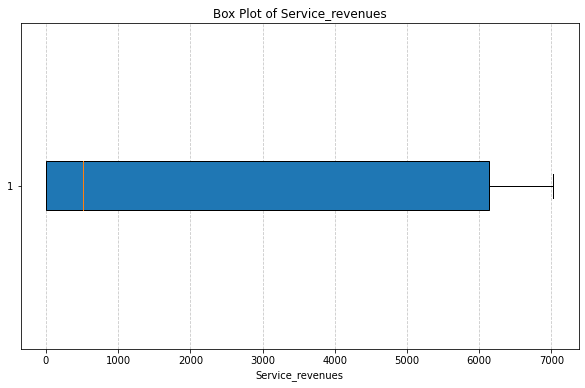

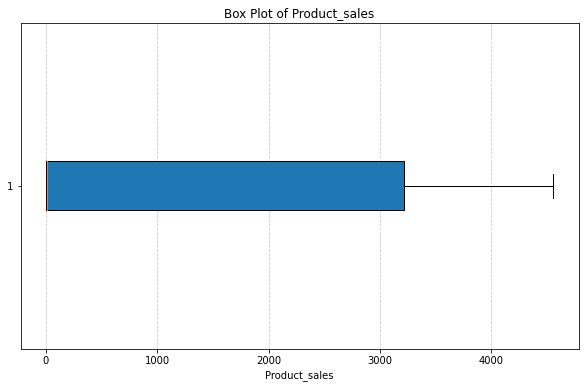

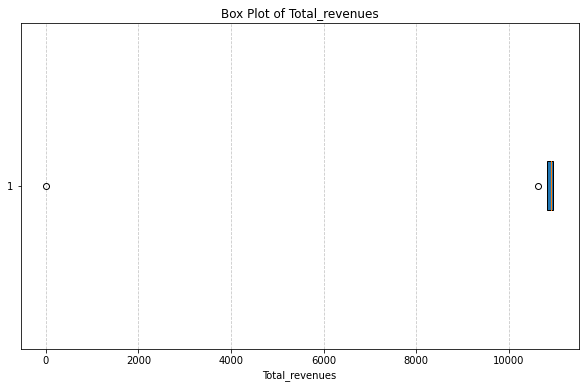

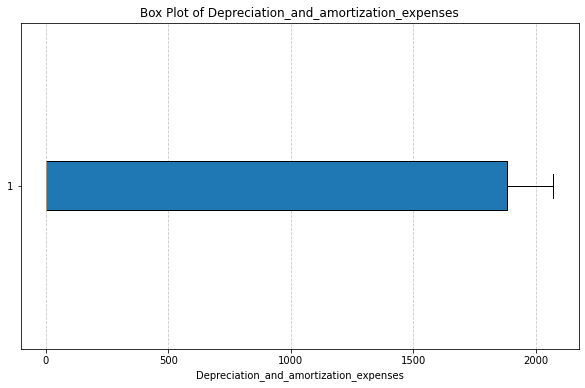

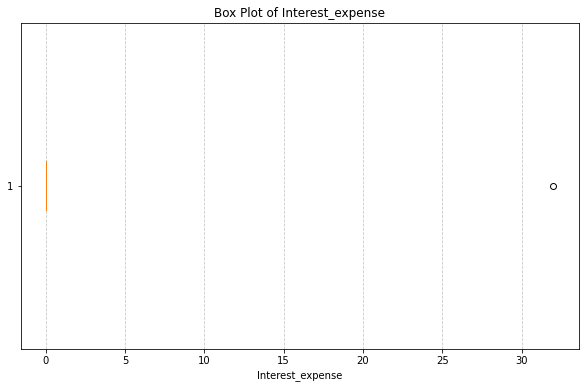

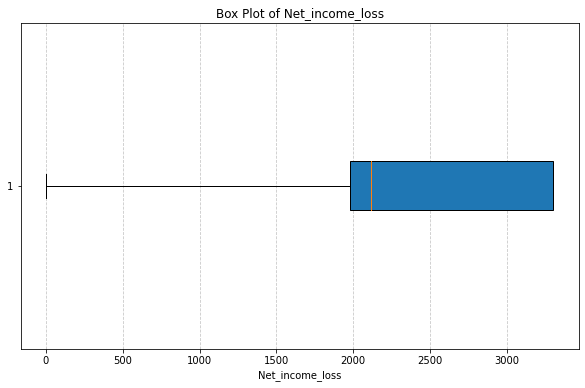

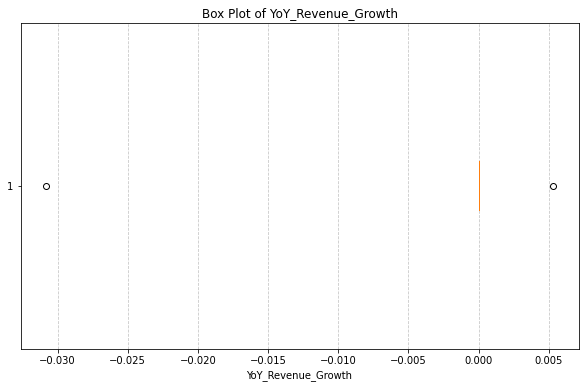

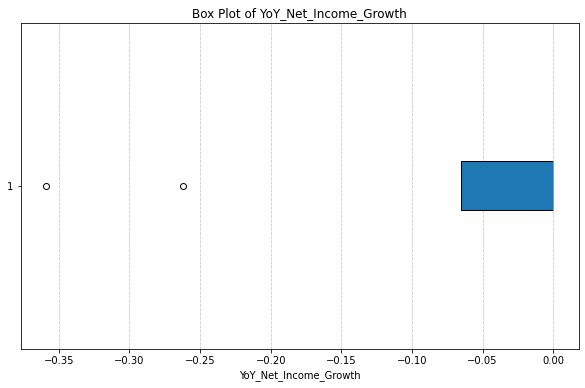

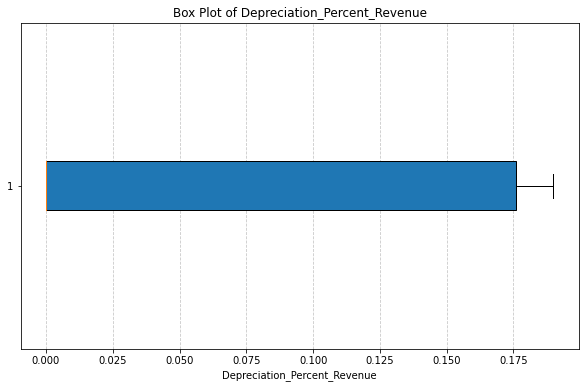

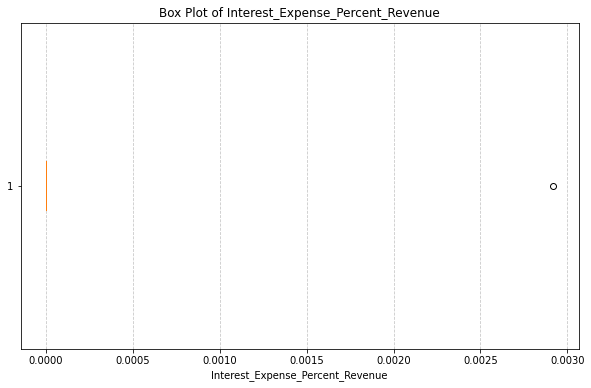

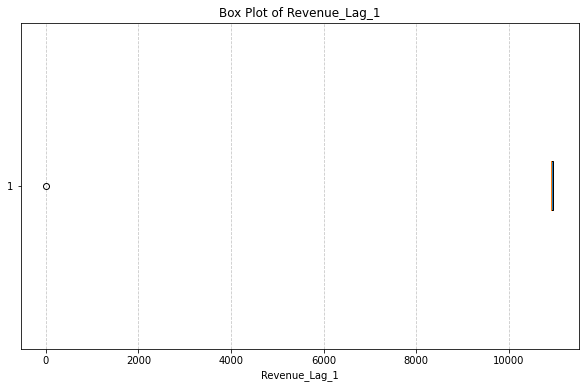

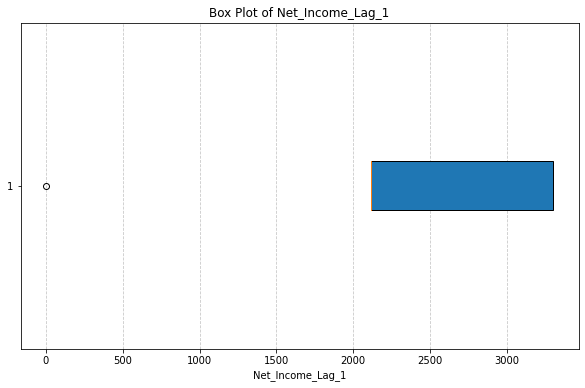

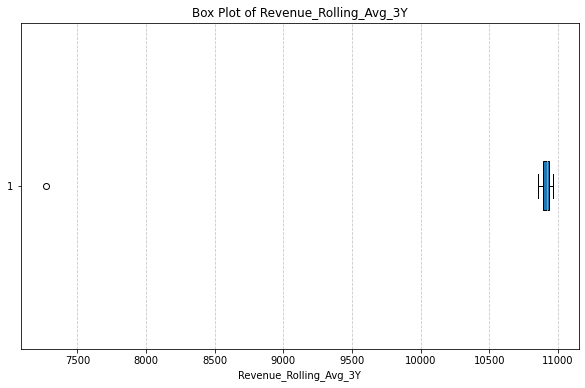

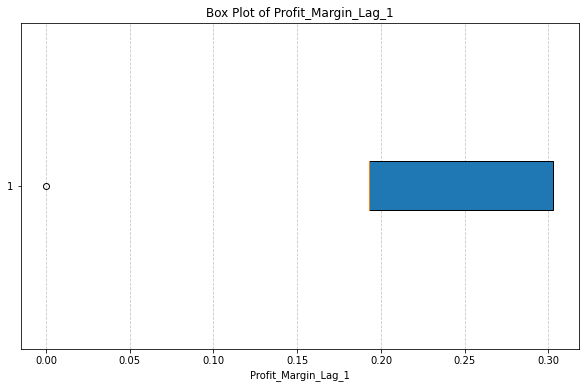

In [0]:
# Loop through each feature and create a box plot
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df_eda[feature], vert=False, patch_artist=True)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


The boxplots provide a visual representation of the spread and potential outliers within our key financial variables. It's important to investigate these outliers to determine whether they are genuine data points or errors. Financial data can often contain outliers due to significant business events, changes in market conditions, or unique operational factors. For genuine outliers, they should be retained to provide a true representation of the financial health, but erroneous ones will need correction to ensure data integrity. Overall, the variability and the presence of outliers here seem plausible, but further review of individual outliers is recommended before proceeding with modeling.

In [0]:
# Find rows where key features are zero
zero_value_rows = df_eda[(df_eda['Service_revenues'] == 0) & 
                     (df_eda['Product_sales'] == 0) & 
                     (df_eda['Total_revenues'] == 0) & 
                     (df_eda['Net_income_loss'] == 0)]

# Display the rows with all zero values for these columns
print("\n--- Rows with All Key Features as Zero ---")
print(zero_value_rows)



--- Rows with All Key Features as Zero ---
   Service_revenues  Product_sales  Total_revenues  \
0               0.0            0.0             0.0   

   Depreciation_and_amortization_expenses  Interest_expense  Net_income_loss  \
0                                     0.0               0.0              0.0   

   YoY_Revenue_Growth  YoY_Net_Income_Growth  Depreciation_Percent_Revenue  \
0                 0.0                    0.0                           0.0   

   Interest_Expense_Percent_Revenue  Revenue_Lag_1  Net_Income_Lag_1  \
0                               0.0        10907.0            2117.0   

   Revenue_Rolling_Avg_3Y  Profit_Margin_Lag_1  
0            10916.666667             0.193069  


The row with all zero values across the key features except for lagged values seems to indicate either a placeholder or missing information for that specific period. Given the nature of financial data, an entire row of zero values is unlikely unless it corresponds to an unusual scenario, such as an inactive financial period, data entry errors, or a lack of recorded activity.

Handling the Row: Depending on the context:
- If it's a valid inactive period, keep the row as is.
- If it's an erroneous row due to data issues, consider removing it to avoid skewing the analysis.

I will remove it as it is highly unlikely for a company like Williams to report every financial metric as zero.

In [0]:
# Remove rows where all key financial metrics are zero
df_eda = df_eda.loc[~((df_eda['Service_revenues'] == 0) & 
                      (df_eda['Product_sales'] == 0) & 
                      (df_eda['Total_revenues'] == 0) & 
                      (df_eda['Depreciation_and_amortization_expenses'] == 0) & 
                      (df_eda['Interest_expense'] == 0) & 
                      (df_eda['Net_income_loss'] == 0))]

# Print to confirm removal
print("--- Updated DataFrame After Removing Rows with All Zeros ---")
print(df_eda.head())


--- Updated DataFrame After Removing Rows with All Zeros ---
   Service_revenues  Product_sales  Total_revenues  \
1            7026.0         2779.0         10907.0   
2             490.0            0.0         10907.0   
3               0.0            0.0         10907.0   
4            6536.0         4556.0         10965.0   
5             535.0           20.0         10965.0   

   Depreciation_and_amortization_expenses  Interest_expense  Net_income_loss  \
1                                  2071.0               0.0           3303.0   
2                                     0.0               0.0           3303.0   
3                                     0.0               0.0           3303.0   
4                                  2009.0               0.0           2117.0   
5                                     0.0              32.0           2117.0   

   YoY_Revenue_Growth  YoY_Net_Income_Growth  Depreciation_Percent_Revenue  \
1            0.000000               0.000000           

The row with all zero values across key financial metrics has been removed from the DataFrame (df_eda). This was done based on our confidence in the completeness and accuracy of the original 10-K filings, ensuring that all periods were properly reported. Removing this row helps maintain the quality and integrity of the dataset, avoiding skewed results during analysis or model training.

We do see more 0 values, but I will keep them for the following considerations these rows are being kept due to the plausible context of operational downtime or other industry-specific factors. The presence of zeros can provide insight into periods of inactivity or changes in operations that are relevant for understanding revenue patterns.


In [0]:
# Check for rows where key revenue columns are all zero
zero_rows = df_eda[(df_eda['Service_revenues'] == 0) & 
                   (df_eda['Product_sales'] == 0) & 
                   (df_eda['Total_revenues'] == 0) & 
                   (df_eda['Net_income_loss'] == 0)]

# Print the count of zero rows
print(f"Number of rows with all key revenue columns as zero: {len(zero_rows)}")


Number of rows with all key revenue columns as zero: 0


In [0]:
# Find rows with negative growth rates
negative_growth_rows = df_eda[(df_eda['YoY_Revenue_Growth'] < 0) | (df_eda['YoY_Net_Income_Growth'] < 0)]

# Display rows with negative growth rates
print("\n--- Rows with Negative Growth Rates ---")
print(negative_growth_rows)


--- Rows with Negative Growth Rates ---
   Service_revenues  Product_sales  Total_revenues  \
4            6536.0         4556.0         10965.0   
7            6001.0         4536.0         10627.0   

   Depreciation_and_amortization_expenses  Interest_expense  Net_income_loss  \
4                                  2009.0               0.0           2117.0   
7                                  1842.0               0.0           1562.0   

   YoY_Revenue_Growth  YoY_Net_Income_Growth  Depreciation_Percent_Revenue  \
4            0.005318              -0.359068                      0.183219   
7           -0.030825              -0.262163                      0.173332   

   Interest_Expense_Percent_Revenue  Revenue_Lag_1  Net_Income_Lag_1  \
4                               0.0        10907.0            3303.0   
7                               0.0        10965.0            2117.0   

   Revenue_Rolling_Avg_3Y  Profit_Margin_Lag_1  
4            10926.333333             0.302833  
7    

The rows with negative growth rates reflect genuine business conditions, particularly relevant for an oil and gas company like Williams. The declines in revenue and net income are likely due to operational challenges or external market factors typical in the industry, such as fluctuating commodity prices or economic cycles. The high depreciation expenses, coupled with zero interest expenses, suggest continued maintenance or asset investments without an increase in debt. These rows are important to retain, as they provide valuable insights into downturn periods, which are crucial for robust predictive modeling. We can also consider adding dummy variables to mark these periods, allowing our model to better capture shifts in company performance.

In [0]:
# Capping outliers for selected features (Winsorization approach)
# Applying Winsorization to multiple features that showed significant outliers
features_to_winsorize = [
    'Service_revenues', 
    'Product_sales', 
    'Total_revenues', 
    'Net_income_loss', 
    'Depreciation_and_amortization_expenses'
]

# Applying clipping (Winsorization) for each feature to remove extreme outliers
for feature in features_to_winsorize:
    df_eda[feature] = df_eda[feature].clip(
        lower=df_eda[feature].quantile(0.05), 
        upper=df_eda[feature].quantile(0.95)
    )

# Displaying updated DataFrame for verification
print("\n--- Updated DataFrame After Winsorization ---")
print(df_eda.describe())


--- Updated DataFrame After Winsorization ---
       Service_revenues  Product_sales  Total_revenues  \
count          7.000000       7.000000        7.000000   
mean        2920.142857    1697.857143    10903.857143   
std         3338.852669    2191.727053       89.850670   
min            0.000000       0.000000    10711.000000   
25%          245.000000       0.000000    10907.000000   
50%          535.000000      20.000000    10907.000000   
75%         6268.500000    3657.500000    10965.000000   
max         6879.000000    4550.000000    10965.000000   

       Depreciation_and_amortization_expenses  Interest_expense  \
count                                7.000000          7.000000   
mean                               843.342857          4.571429   
std                               1053.786865         12.094863   
min                                  0.000000          0.000000   
25%                                  0.000000          0.000000   
50%                         

The above cell applies Winsorization (capping outliers) to multiple features that exhibited significant outliers in their distributions. Specifically, the features 'Service_revenues', 'Product_sales', 'Total_revenues', 'Net_income_loss', and 'Depreciation_and_amortization_expenses' were Winsorized at the 5th and 95th percentiles.

Reasoning:
- Outlier Management: The goal was to reduce the influence of extreme outliers that could potentially distort the analysis or lead to misleading results in the subsequent ML modeling phase.
- Business Context Consideration: Given the nature of financial data from Williams, a company in the oil and gas sector, extreme values might be due to the inherent volatility of the industry. However, some of these values appeared to be too extreme and could unduly influence the model.
- Balancing Robustness and Detail: Winsorization was chosen instead of removing these rows entirely to retain as much of the data as possible, while still making the dataset more robust. This approach allows us to reduce the skew of the data without completely excluding important trends that may be present.
- By capping the values, we ensure that extreme cases do not disproportionately impact model training, while retaining the overall trends in the data for predictive analysis.

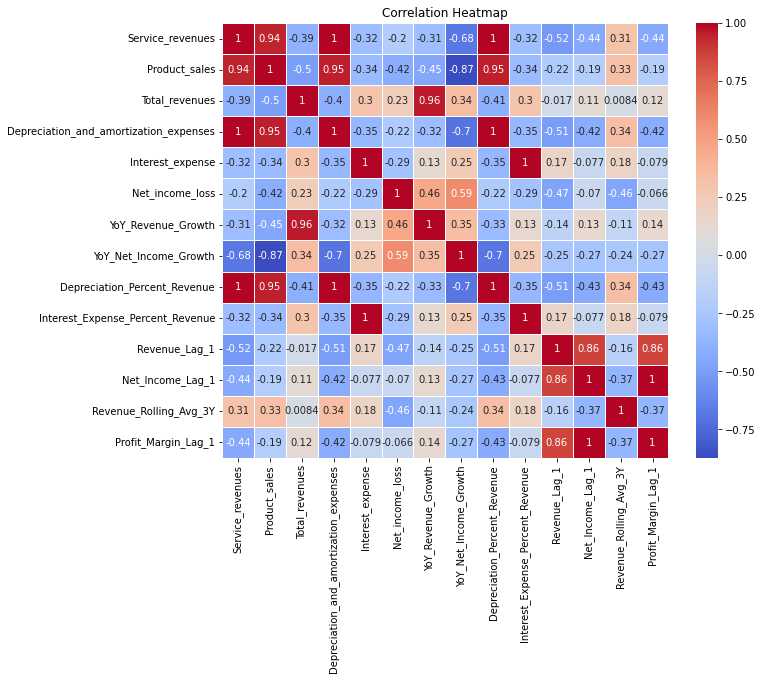

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_eda.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Insights:
- The correlation heatmap reveals several features with extremely high positive correlations, particularly among Service_revenues, Product_sales, Total_revenues, and Net_income_loss. Such high correlations suggest a strong relationship and potential redundancy among these features, which could lead to multicollinearity in predictive modeling.
- Some features, such as Interest_expense, exhibit strong negative correlations with growth metrics, which could indicate the impact of financing costs on revenue growth.
- There are features with low or moderate correlations, suggesting they could provide unique and complementary information for the model.

Action Steps:
- Feature Selection to Mitigate Multicollinearity: Drop features that are highly correlated with each other, retaining one representative feature among those showing very high correlation (e.g., between Service_revenues, Product_sales, and Total_revenues).
- Consider Dimensionality Reduction: Alternatively, we could apply Principal Component Analysis (PCA) to reduce dimensionality while retaining the variance in the dataset.
- Move Forward to Model Preparation: After refining the feature set, we will proceed with the model preparation and analysis phase.

In [0]:
# Dropping highly correlated features to mitigate multicollinearity
# Retain only 'Total_revenues' as the representative feature among highly correlated ones
features_to_drop = ['Service_revenues', 'Product_sales']
df_eda = df_eda.drop(columns=features_to_drop)

# Print summary to verify changes
print("\n--- DataFrame After Feature Selection ---")
print(df_eda.describe())


--- DataFrame After Feature Selection ---
       Total_revenues  Depreciation_and_amortization_expenses  \
count        7.000000                                7.000000   
mean     10903.857143                              843.342857   
std         89.850670                             1053.786865   
min      10711.000000                                0.000000   
25%      10907.000000                                0.000000   
50%      10907.000000                                0.000000   
75%      10965.000000                             1925.500000   
max      10965.000000                             2052.400000   

       Interest_expense  Net_income_loss  YoY_Revenue_Growth  \
count          7.000000         7.000000            7.000000   
mean           4.571429      2569.785714           -0.003644   
std           12.094863       699.477892            0.012149   
min            0.000000      1728.500000           -0.030825   
25%            0.000000      2117.000000           

This code selects Total_revenues as the representative feature and drops Service_revenues and Product_sales. Let me know if you'd like to make any changes to this approach.

In [0]:
# Checking for any remaining missing values in the dataset
print("\n--- Missing Values After Feature Selection ---")
print(df_eda.isnull().sum())

# Checking for any potential extreme values after feature selection
print("\n--- Summary Statistics After Feature Selection ---")
print(df_eda.describe())


--- Missing Values After Feature Selection ---
Total_revenues                            0
Depreciation_and_amortization_expenses    0
Interest_expense                          0
Net_income_loss                           0
YoY_Revenue_Growth                        0
YoY_Net_Income_Growth                     0
Depreciation_Percent_Revenue              0
Interest_Expense_Percent_Revenue          0
Revenue_Lag_1                             0
Net_Income_Lag_1                          0
Revenue_Rolling_Avg_3Y                    0
Profit_Margin_Lag_1                       0
dtype: int64

--- Summary Statistics After Feature Selection ---
       Total_revenues  Depreciation_and_amortization_expenses  \
count        7.000000                                7.000000   
mean     10903.857143                              843.342857   
std         89.850670                             1053.786865   
min      10711.000000                                0.000000   
25%      10907.000000             

The presence of negative growth rates and several zero values might indicate challenging periods for the company or inactive periods, which could be important features for modeling. No action is required unless we see adverse effects during model training.

Variance in key features such as Net Income, Depreciation and Amortization, and Interest Expense is beneficial for the model, as they can provide signals to distinguish between different outcomes.

Let's proceed with scaling the data to normalize the features, particularly because features like Interest Expense have varying ranges, which could impact the model if left unscaled. 

In [0]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select features to scale
features_to_scale = [
    'Total_revenues', 'Depreciation_and_amortization_expenses',
    'Interest_expense', 'Net_income_loss', 'YoY_Revenue_Growth',
    'YoY_Net_Income_Growth', 'Depreciation_Percent_Revenue',
    'Interest_Expense_Percent_Revenue', 'Revenue_Lag_1', 'Net_Income_Lag_1',
    'Revenue_Rolling_Avg_3Y', 'Profit_Margin_Lag_1'
]

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the data, creating a new DataFrame for the scaled data
scaled_data = scaler.fit_transform(df_eda[features_to_scale])

# Create a new DataFrame for the scaled data and retain other non-scaled columns
df_scaled = pd.DataFrame(scaled_data, columns=features_to_scale, index=df_eda.index)

# If there are other columns in df_eda that should not be scaled, concatenate them
non_scaled_features = df_eda.drop(columns=features_to_scale)
df_scaled = pd.concat([df_scaled, non_scaled_features], axis=1)

# Summary note for documentation
"""
Summary Note:
The features were standardized using `StandardScaler` from scikit-learn, which transforms the data by centering it to a mean of 0 and scaling it to unit variance. 
This is done to ensure that all features contribute equally to the model and that no feature with a larger numerical range disproportionately affects the results.
This step prepares the data for ML modeling, where uniform feature scaling can enhance model performance, particularly for algorithms that are sensitive to scale differences, such as SVMs and neural networks.
"""

# Verify scaled data
print("\n--- Scaled Data Summary ---")
print(df_scaled.describe())


--- Scaled Data Summary ---
       Total_revenues  Depreciation_and_amortization_expenses  \
count    7.000000e+00                            7.000000e+00   
mean    -3.172066e-15                            1.268826e-16   
std      1.080123e+00                            1.080123e+00   
min     -2.318397e+00                           -8.644200e-01   
25%      3.778128e-02                           -8.644200e-01   
50%      3.778128e-02                           -8.644200e-01   
75%      7.350177e-01                            1.109203e+00   
max      7.350177e-01                            1.239274e+00   

       Interest_expense  Net_income_loss  YoY_Revenue_Growth  \
count      7.000000e+00     7.000000e+00            7.000000   
mean       7.930164e-17     9.516197e-17            0.000000   
std        1.080123e+00     1.080123e+00            1.080123   
min       -4.082483e-01    -1.299101e+00           -2.416678   
25%       -4.082483e-01    -6.991850e-01            0.323981   
5

The feature scaling was applied to ensure uniformity in the range of feature values, making all selected numerical columns have a mean of approximately 0 and a standard deviation of 1. This is critical for many machine learning models, especially those sensitive to feature scales, such as linear regression and distance-based models.

With the data now properly scaled, it is ready for machine learning model development.

In [0]:
# Save the scaled DataFrame as a Spark table for easy retrieval in the ML notebook
from pyspark.sql import SparkSession

# Convert Pandas DataFrame to Spark DataFrame
spark = SparkSession.builder.getOrCreate()
spark_df = spark.createDataFrame(df_scaled)

# Save the Spark DataFrame as a managed table
spark_df.write.mode('overwrite').saveAsTable("williams_finops_scaled_data")

## Next Steps:

The EDA has provided us with comprehensive insights into the nature and quality of the financial data. With the data now standardized and cleansed, we will proceed to the machine learning model development notebook. The objective will be to build and evaluate models that provide predictive insights into financial outcomes for Williams, potentially identifying key drivers of financial performance.

In [0]:
# Create the directory if it doesn't exist
import os
if not os.path.exists('/dbfs/FileStore'):
    os.makedirs('/dbfs/FileStore')

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = spark_df.toPandas()

# Write the Pandas DataFrame to a CSV file in FileStore
pandas_df.to_csv('/dbfs/FileStore/williams_finops_scaled_data_pandas.csv', index=False)

# Save the Spark DataFrame as a Spark SQL table for easy querying
spark_df.write.mode('overwrite').saveAsTable("williams_finops_scaled_data")

In [0]:
%sh
ls /dbfs/FileStore/

williams_finops_scaled_data_pandas.csv


In [0]:
# Read the CSV to verify contents
import pandas as pd
df = pd.read_csv('/dbfs/FileStore/williams_finops_scaled_data_pandas.csv')
print(df.head())


   Total_revenues  Depreciation_and_amortization_expenses  Interest_expense  \
0        0.037781                                1.239274         -0.408248   
1        0.037781                               -0.864420         -0.408248   
2        0.037781                               -0.864420         -0.408248   
3        0.735018                                1.194790         -0.408248   
4        0.735018                               -0.864420          2.449490   

   Net_income_loss  YoY_Revenue_Growth  YoY_Net_Income_Growth  \
0         1.132219            0.323981               0.621951   
1         1.132219            0.323981               0.621951   
2         1.132219            0.323981               0.621951   
3        -0.699185            0.796773              -1.894435   
4        -0.699185            0.323981               0.621951   

   Depreciation_Percent_Revenue  Interest_Expense_Percent_Revenue  \
0                      1.239004                         -0.408248

In [0]:
%sh
ls /dbfs/FileStore/

williams_finops_scaled_data_pandas.csv


In [0]:
pandas_df = spark_df.toPandas()
display(pandas_df)


Total_revenues,Depreciation_and_amortization_expenses,Interest_expense,Net_income_loss,YoY_Revenue_Growth,YoY_Net_Income_Growth,Depreciation_Percent_Revenue,Interest_Expense_Percent_Revenue,Revenue_Lag_1,Net_Income_Lag_1,Revenue_Rolling_Avg_3Y,Profit_Margin_Lag_1
0.03778128430272551,1.2392742933410297,-0.40824829046386296,1.1322186915590091,0.3239811392994783,0.6219509228095992,1.239003766026342,-0.40824829046386296,-2.4494294581490776,-2.119858521601519,0.4064175806077414,-2.1137133152146377
0.03778128430272551,-0.8644199569096855,-0.40824829046386296,1.1322186915590091,0.3239811392994783,0.6219509228095992,-0.864971912871599,-0.40824829046386296,0.4006603019738179,0.8944864278418221,-2.448687368523556,0.898116014298968
0.03778128430272551,-0.8644199569096855,-0.40824829046386296,1.1322186915590091,0.3239811392994783,0.6219509228095992,-0.864971912871599,-0.40824829046386296,0.4006603019738179,0.8944864278418221,0.39884643544270687,0.898116014298968
0.7350177127985357,1.1947896263848412,-0.40824829046386296,-0.6991850254059968,0.7967726843359316,-1.8944346425985956,1.1652206393074998,-0.40824829046386296,0.4006603019738179,0.8944864278418221,0.41398872577277457,0.898116014298968
0.7350177127985357,-0.8644199569096855,2.4494897427831783,-0.6991850254059968,0.3239811392994783,0.6219509228095992,-0.864971912871599,2.449489742783178,0.41581618407587423,-0.1878669206413153,0.4291310161028408,-0.19354490922742154
0.7350177127985357,-0.8644199569096855,-0.40824829046386296,-0.6991850254059968,0.3239811392994783,0.6219509228095992,-0.864971912871599,-0.40824829046386296,0.41581618407587423,-0.1878669206413153,0.4442733064329085,-0.19354490922742154
-2.3183969913038056,1.0236159079128722,-0.40824829046386296,-1.2991009984590363,-2.4166783808333236,-1.2153199714494,1.0556632461525548,-0.40824829046386296,0.41581618407587423,-0.1878669206413153,0.3560303041645862,-0.19354490922742154
